In [1]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
numpy.random.seed(7)

In [18]:
dataframe = pandas.read_csv('Sindh_Updated.csv', engine='python')
dataframe
dataframe.drop('Last_Update', axis=1, inplace=True)
dataframe.drop('Province_State', axis=1, inplace=True)
dataset = dataframe.values
# dataset = dataset.astype('float32')

In [19]:
dataset.shape
# dataset

(183, 9)

In [20]:
scaler = MinMaxScaler(feature_range=(0, 9))
dataset = scaler.fit_transform(dataset)

In [21]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

122 61


In [22]:

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [25]:

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
120/120 - 5s - loss: 7.4367
Epoch 2/100
120/120 - 0s - loss: 5.8668
Epoch 3/100
120/120 - 0s - loss: 4.1365
Epoch 4/100
120/120 - 0s - loss: 2.5095
Epoch 5/100
120/120 - 0s - loss: 1.3985
Epoch 6/100
120/120 - 0s - loss: 0.7239
Epoch 7/100
120/120 - 0s - loss: 0.4018
Epoch 8/100
120/120 - 0s - loss: 0.2815
Epoch 9/100
120/120 - 0s - loss: 0.2221
Epoch 10/100
120/120 - 0s - loss: 0.1770
Epoch 11/100
120/120 - 0s - loss: 0.1405
Epoch 12/100
120/120 - 0s - loss: 0.1089
Epoch 13/100
120/120 - 0s - loss: 0.0857
Epoch 14/100
120/120 - 0s - loss: 0.0684
Epoch 15/100
120/120 - 0s - loss: 0.0568
Epoch 16/100
120/120 - 0s - loss: 0.0475
Epoch 17/100
120/120 - 0s - loss: 0.0414
Epoch 18/100
120/120 - 0s - loss: 0.0370
Epoch 19/100
120/120 - 0s - loss: 0.0331
Epoch 20/100
120/120 - 0s - loss: 0.0310
Epoch 21/100
120/120 - 0s - loss: 0.0284
Epoch 22/100
120/120 - 0s - loss: 0.0265
Epoch 23/100
120/120 - 0s - loss: 0.0244
Epoch 24/100
120/120 - 0s - loss: 0.0227
Epoch 25/100
120/120 - 0s

In [29]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

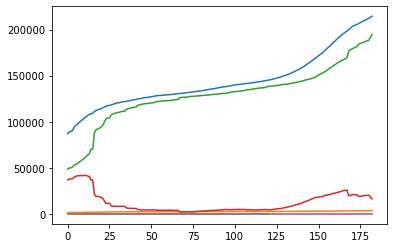

In [30]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

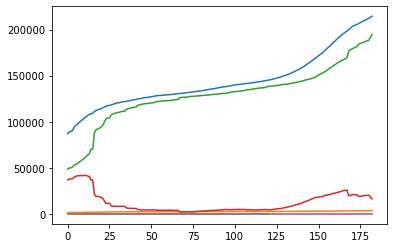

In [31]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()